# Stock with TA Indicators

In [1]:
import warnings
#warnings.filterwarnings('ignore')

In [2]:
import sys
import os
import platform 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sqlite3
import datetime

In [3]:
import yfinance as yf
import option
import utils

In [4]:
# import your own library
#from stock import Stock
from stock_AP import Stock

In [5]:
opt = option.Option()
# set default settings

# we use relative path here, you can set it with a full path
opt.data_dir = "./data"
opt.output_dir = os.path.join(opt.data_dir, "daily")
opt.sqlite_db = os.path.join(opt.data_dir, "sqlite/Equity.db")

# override default option if needed, otherwise use the default settings

In [6]:
print(os.getcwd())

C:\Users\gogoc\OneDrive - Temple University\Temple\TempleCourses\Fall24\cis4360-Fall24\Labs


In [7]:
# check if all the attributes of the option object
print(vars(opt))

{'name': 'standard', 'user': 'gogoc', 'cli_args': {}, 'environ': 'dev', 'verbose': False, 'force': False, 'start_date': None, 'end_date': None, 'tickers': None, 'port_name': None, 'data_dir': './data', 'output_dir': './data\\daily', 'sqlite_db': './data\\sqlite/Equity.db'}


In [8]:
ticker = 'AAPL'
db_connection = sqlite3.connect(opt.sqlite_db)
stock = Stock(opt, db_connection, ticker)

In [9]:
start_date = datetime.date(2020, 10, 1)
end_date = datetime.date(2024, 10, 1)

df = stock.get_daily_hist_price_from_db(start_date, end_date)
df.head()

,Ticker,AsOfDate,Open,High,Low,Close,Volume,Dividend,StockSplits
Date,,,,,,,,,
2020-10-01,AAPL,2020-10-01,114.963080,115.041261,113.194269,114.132423,116120400.0,0.0,0
2020-10-02,AAPL,2020-10-02,110.321157,112.744727,109.666405,110.448196,144712000.0,0.0,0
2020-10-05,AAPL,2020-10-05,111.317954,113.995602,110.966145,113.849014,106243800.0,0.0,0
2020-10-06,AAPL,2020-10-06,113.067225,113.477673,109.695733,110.585030,161498200.0,0.0,0
2020-10-07,AAPL,2020-10-07,112.011803,112.920640,111.532947,112.461334,96849000.0,0.0,0


In [10]:
df.tail()

,Ticker,AsOfDate,Open,High,Low,Close,Volume,Dividend,StockSplits
Date,,,,,,,,,
2024-08-26,AAPL,2024-08-26,226.759995,227.279999,223.889999,227.179993,30602200.0,0.0,0
2024-08-27,AAPL,2024-08-27,226.000000,228.850006,224.889999,228.029999,35934600.0,0.0,0
2024-08-28,AAPL,2024-08-28,227.919998,229.860001,225.679993,226.490005,38052200.0,0.0,0
2024-08-29,AAPL,2024-08-29,230.100006,232.919998,228.880005,229.789993,51906300.0,0.0,0
2024-08-30,AAPL,2024-08-30,230.190002,230.399994,227.479996,229.000000,52990800.0,0.0,0


***Let's do some data visualization***

In [11]:
import plotly.graph_objects as go

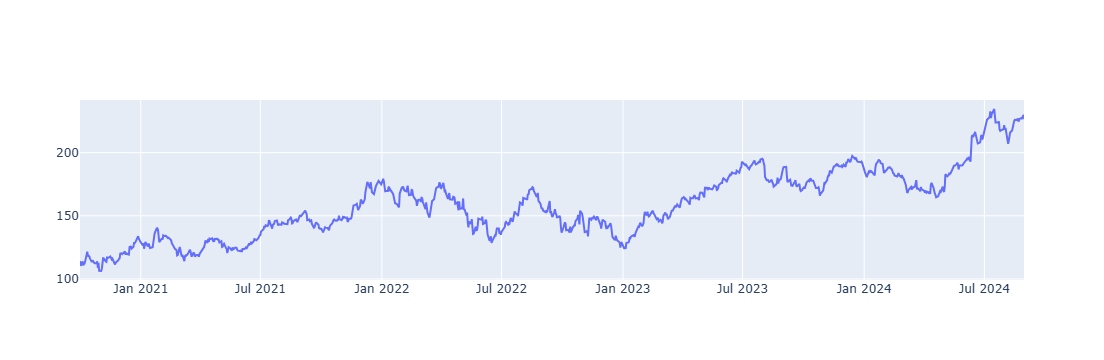

In [13]:
fig = go.Figure(data=go.Scatter(x=df.index,y=df['Close'], mode='lines'))
fig.show()

***Now plot the daily price as Candle stick***

https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh

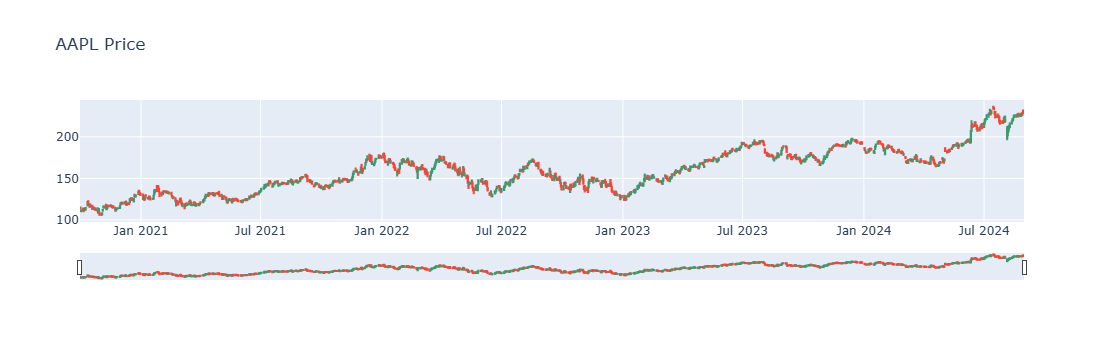

In [14]:
import plotly.graph_objects as go

candlestick = go.Candlestick(
                            x=df.AsOfDate,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close'],
                            name = ticker
                            )

traces = []
traces.append(candlestick)

layout = {"title": "{} Price".format(ticker)}
fig = go.Figure(data=traces, layout=layout)

fig.show()


### Now call the method to calculate all the Technical Indicators###

In [22]:
stock.calc_all_TA_indicators()
df = stock.ohlcv_df
print(df.tail(10))

           Ticker    AsOfDate        Open        High         Low       Close  \
Date                                                                            
2024-08-19   AAPL  2024-08-19  225.720001  225.990005  223.039993  225.889999   
2024-08-20   AAPL  2024-08-20  225.770004  227.169998  225.449997  226.509995   
2024-08-21   AAPL  2024-08-21  226.520004  227.979996  225.050003  226.399994   
2024-08-22   AAPL  2024-08-22  227.789993  228.339996  223.899994  224.529999   
2024-08-23   AAPL  2024-08-23  225.660004  228.220001  224.330002  226.839996   
2024-08-26   AAPL  2024-08-26  226.759995  227.279999  223.889999  227.179993   
2024-08-27   AAPL  2024-08-27  226.000000  228.850006  224.889999  228.029999   
2024-08-28   AAPL  2024-08-28  227.919998  229.860001  225.679993  226.490005   
2024-08-29   AAPL  2024-08-29  230.100006  232.919998  228.880005  229.789993   
2024-08-30   AAPL  2024-08-30  230.190002  230.399994  227.479996  229.000000   

                Volume  Div

In [23]:
print(df.columns)

Index(['Ticker', 'AsOfDate', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Dividend', 'StockSplits', 'RSI', 'SMA_10', 'SMA_20', 'SMA_50',
       'SMA_200', 'BBupperBand', 'BBlowerBand', 'BBmiddleBand', 'ADX', 'DMP',
       'DMN', 'MACDline', 'MACDsignal'],
      dtype='object')


### Question 1: Plot the 10, 20, 50, 200 Simple Moving Averages along with the CandleSticks

In [18]:
# Type your code

### Question 2: Plot RSI with additional 70 and 30 horizontal lines

In [21]:
# Type your code here

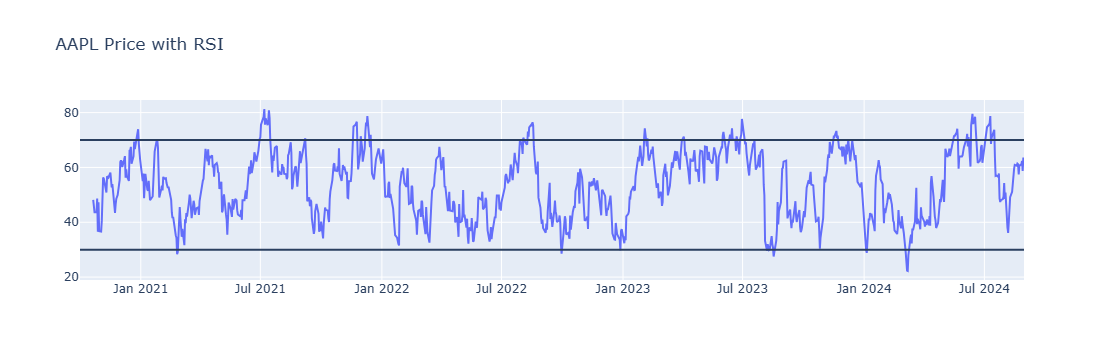

In [27]:
r1 = df['RSI']
# ...
#fig = go.Figure(data=traces3, layout = layout)
#fig.add_hline(y=70)
#fig.add_hline(y=30)
#fig.show()

### Question 3: Plot the MACD along with its signal line

In [ ]:
# Type your code here

### Question 4: The MACD line above is from calling the pandas_ta library. Can you calculate MACD without calling padnas_ta, but instead calculate it by using pandas sma function?. Show that the two calculation produces the same result

In [ ]:
# Type your code here